In [1]:
# This library is used for data manipulation and analysis.
import pandas as pd
# This library is used for numerical computing.
import numpy as np
# For splitting data into training and testing sets.
from sklearn.model_selection import train_test_split
# This library is used for encoding categorical variables.
from sklearn.preprocessing import LabelEncoder
# This library is used for evaluating model accuracy.
from sklearn.metrics import accuracy_score
# This library is used for creating a sequential neural network model.
from tensorflow.keras.models import Sequential
 # This library is used for to import different layers for building neural networks.
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
# This library is used for data visualization.
import matplotlib.pyplot as plt
# This library is used for generating classification metrics report.
from sklearn.metrics import classification_report
# This library is used for standardizing features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
# This library is used for Principal Component Analysis, a dimensionality reduction technique.
from sklearn.decomposition import PCA
# Importing LabelBinarizer from sklearn.preprocessing for binarizing labels in multi-class classification tasks
from sklearn.preprocessing import LabelBinarizer
# Importing roc_curve, auc, and roc_auc_score from sklearn.metrics for computing Receiver Operating Characteristic (ROC) curve metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
# Load the dataset for analysis.
cicids_data = pd.read_csv("/content/drive/MyDrive/AI-Based IDS project FYP/CICIDS codes and datasets/CICIDS_2017_MERGED_DATASET .csv")

In [3]:
cicids_data.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Flow Bytes/s,Flow Packets/s,Fwd IAT Total,Bwd IAT Total,Fwd Packets/s,...,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Average Packet Size,Label
0,3,2,0,12,0,4.000000e+06,666666.66670,3,0,666666.666700,...,0,0,0,0,1,0,0,0,9.0,BENIGN
1,109,1,1,6,6,1.100917e+05,18348.62385,0,0,9174.311927,...,0,0,0,0,1,1,0,0,9.0,BENIGN
2,52,1,1,6,6,2.307692e+05,38461.53846,0,0,19230.769230,...,0,0,0,0,1,1,0,0,9.0,BENIGN
3,34,1,1,6,6,3.529412e+05,58823.52941,0,0,29411.764710,...,0,0,0,0,1,1,0,0,9.0,BENIGN
4,3,2,0,12,0,4.000000e+06,666666.66670,3,0,666666.666700,...,0,0,0,0,1,0,0,0,9.0,BENIGN


In [4]:
#Display a total number of different types of attacks.
cicids_data.value_counts(' Label')

 Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [7]:
# Selecting features apart from the label column for training.
features = cicids_data.drop([" Label"], axis = 1)

# Standardize features (important for PCA).
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Credits: https://www.geeksforgeeks.org/principal-component-analysis-with-python/
# Initialize PCA with desired number of components.
# Choose the number of principal components.
n_components = 20
pca = PCA(n_components=n_components)

# Fit PCA on scaled features.
pca.fit(scaled_features)

PCA(n_components=20)

In [8]:
# Get transformed data (principal components).
transformed_data = pca.transform(scaled_features)

In [12]:
# Separate predictors (features) and the target (label).
X = transformed_data
y = cicids_data[' Label']

# Convert label column to numerical values using LabelEncoder.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input (assuming 1D CNN).
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [13]:
#Credits: Machine learning module and https://chat.openai.com
# Define the CNN model with additional layers.
model = Sequential()

# This is the first or input layer of the model which is convolutional layer.
# It has 32 filters and takes input in the shape of (20, 1).
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(20, 1)))

# This layer downsamples the information extracted from the convolutional layer.
model.add(MaxPooling1D(pool_size=2))

# This is another convolutional layer with 64 filters and relu activation function.
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Another max-pooling layer for downsampling.
model.add(MaxPooling1D(pool_size=2))

# This convolutional layer has 128 filters and relu activation function.
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))


# This is flatten layer that converts the output from above series of convolutional  layer into 1-D array for further processing.
model.add(Flatten())

# Next comes the series of fully connected dense layers with 256 neurons.
model.add(Dense(256, activation='relu'))

# This layer helps in normalizing the data by dropping specified percentage of neurons for more robust training.
model.add(Dropout(0.5))

# Another dense layer with 128 neurons.
model.add(Dense(128, activation='relu'))

# This dense layer is the final or output layer of the model which uses number of attack types as the number of neurons,
# and uses softmax as activation function to normalize the output into probabilities.
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 18, 32)            128       
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 9, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 7, 64)             6208      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 128)            24704     
                                                                 
 flatten_1 (Flatten)         (None, 128)              

In [ ]:
# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model for 5 epochs.
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
17675/17675 [==============================] - 279s 16ms/step - loss: 0.1533 - accuracy: 0.9452 - val_loss: 0.1135 - val_accuracy: 0.9529
Epoch 2/5
17675/17675 [==============================] - 278s 16ms/step - loss: 0.1094 - accuracy: 0.9561 - val_loss: 0.0937 - val_accuracy: 0.9620
Epoch 3/5
17675/17675 [==============================] - 265s 15ms/step - loss: 0.1009 - accuracy: 0.9586 - val_loss: 0.0885 - val_accuracy: 0.9618
Epoch 4/5
17675/17675 [==============================] - 285s 16ms/step - loss: 0.0963 - accuracy: 0.9607 - val_loss: 0.1207 - val_accuracy: 0.9463
Epoch 5/5
17675/17675 [==============================] - 298s 17ms/step - loss: 0.0948 - accuracy: 0.9617 - val_loss: 0.0858 - val_accuracy: 0.9653


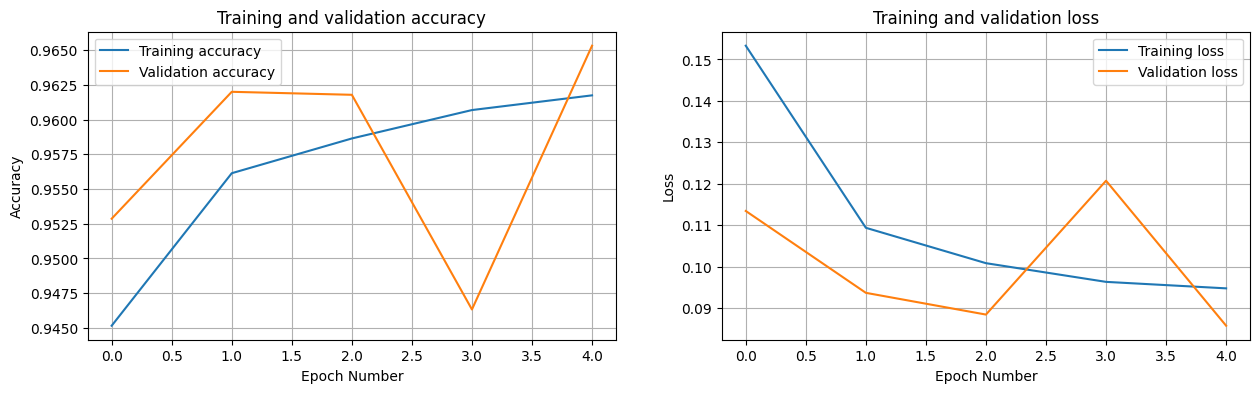

In [ ]:
#Credits: Machine learning module.
#Now we visualize the accuracy and validation loss for the training dataset.
#Create the figure of size 15,4.
fig = plt.figure(figsize=(15,4))

#The 121 subplot says there has to be 1 row, 2 column and the current subplot being added to the first one.
fig.add_subplot(121)
#Now create the graph for training accuracy vs validation accuracy.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#Create legend, title, grid, and labels for the axes.
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and validation accuracy')
plt.grid()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

#The 122 subplot says there has to be 1 row, 2 column and the current subplot being added to the second one.
fig.add_subplot(122)
#Now create the graph for the training loss and validation loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#Create legend, title, grid, and labels for the axes.
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and validation loss')
plt.grid()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

In [ ]:
#Credits: Machine learning module.
#Now we evaluate the model accuracy and loss for traning and test data.
#Here 'verbose' is a parameter used to control the amount of information displayed during training or evalution
#of the model. Here in this classification model it allows you to see the progess of the evalution process for
#both the training and testing datasets.
train_loss , train_acc = model.evaluate(X_train,  y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Classification accuracy on training set: ', train_acc)
print('Classification accuracy on test set: ', test_acc)

70697/70697 - 207s - loss: 0.0848 - accuracy: 0.9652 - 207s/epoch - 3ms/step
17675/17675 - 45s - loss: 0.0858 - accuracy: 0.9653 - 45s/epoch - 3ms/step
Classification accuracy on training set:  0.9652389287948608
Classification accuracy on test set:  0.9653238654136658


In [ ]:
#Predict using the test images with the model.
y_pred = np.argmax(model.predict(X_test), axis=-1)

#Credits: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
#Here we generate the classification report with precision, recall, f1-score, and support along with the accuracy.
#Precision: It is number of instances classified positive are actually positive.
#Recall: It tells us how many actually postive were correctly predicted.
#F1 score: It is harmonic mean of precision and recall. It is a good way to show that model has good balance between precision and recall.
#Support: It tells us number of actual instances.
#Accuracy: It is overall correctly predicted instances out of the total instances.
#Macro avg: It's the average of the evaluation metrics for each class, giving equal weight to each class.
#Weighted avg: It's the weighted average of the evaluation metrics for each class, considering the support for each class as its weight.
#It is useful when there's an imbalance in class distribution.
report = classification_report(y_test, y_pred)
print(report)

17675/17675 [==============================] - 67s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98    454085
           1       0.72      0.26      0.39       386
           2       0.99      0.98      0.98     25588
           3       0.91      0.76      0.83      2055
           4       0.85      0.96      0.90     46259
           5       0.71      0.72      0.71      1103
           6       0.79      0.79      0.79      1146
           7       0.93      0.98      0.95      1570
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         9
          10       0.88      0.93      0.91     31712
          11       0.99      0.48      0.65      1242
          12       0.00      0.00      0.00       291
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00       122

    accuracy                           0.97    565576
   macro avg       0.58      0.52      0.54    565576
weighted avg       0.97   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Credits: https://stackoverflow.com/questions/66635552/keras-assessing-the-roc-auc-of-multiclass-cnn
#Using the trained model predict the class probabilities for the X_train.
y_predicted = model.predict(X_train)
#Using argmax select the class with highest probabilityand convert predicted class probabilites into class labels.
y_predicted = y_predicted.argmax(axis=-1)
print(y_predicted.shape)

70697/70697 [==============================] - 193s 3ms/step
(2262300,)


ROC AUC score: 0.7629757148329614


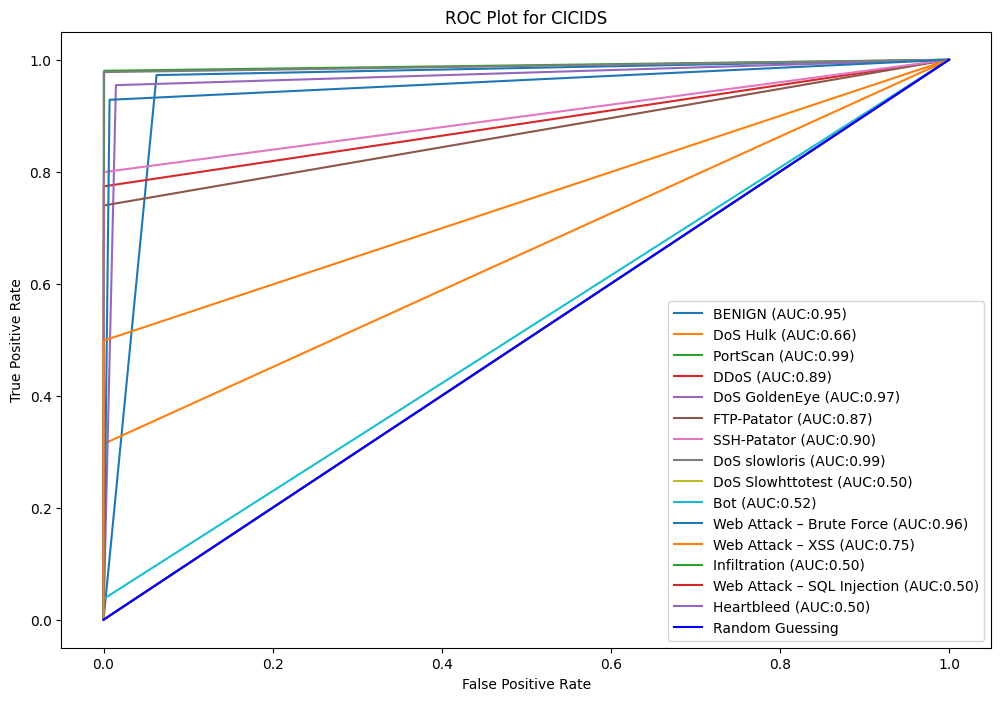

In [ ]:
#Credits: https://stackoverflow.com/questions/66635552/keras-assessing-the-roc-auc-of-multiclass-cnn

#Select the target attacks to evaluate.
target= ['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator','SSH-Patator', 'DoS slowloris','DoS Slowhttotest','Bot', 'Web Attack – Brute Force', 'Web Attack – XSS', 'Infiltration', 'Web Attack – SQL Injection', 'Heartbleed']

# Set plot figure size.
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# The below function is for scoring roc auc score for multi-class classification.
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    #This will create an instance of LabelBinarizer which then can be used to binarize the labels(neccessary for ROC curve).
    lb = LabelBinarizer()
    #Fit the LabelBinarize object to the test labels.
    lb.fit(y_test)
    #Transform test labels into binary representation using transform function form LabelBinarizer.
    y_test = lb.transform(y_test)
    #Transform predicted labels into binary representation using transform function form LabelBinarizer.
    y_pred = lb.transform(y_pred)
    #Initiating loop to compute ROC curves and AUC scores for each class.
    for (idx, c_label) in enumerate(target):
        #Computing flase positive rate(fpr), true positive rate(tpr),and thresholds for the ROC curve of the current class.
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        #Plot the ROC curve for the current class on provided axes.
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    #Plots diagonal line representing random guessing on the ROC plot.
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

#Call the 'multiclass_roc_auc_score' fucntion to calculate ROC AUC score.
print('ROC AUC score:', multiclass_roc_auc_score(y_train, y_predicted))

#Create a legend, title, and set labels for both axes on the ROC plot.
c_ax.legend()
plt.title("ROC Plot for CICIDS")
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
# Extract the random row from the dataset.
user_input = X_test[123456]
# Reshape the user input data to match the input shape expected by the model.
user_input = user_input.reshape(1, 20, 1)

# Make predictions on the user input data.
predictions = model.predict(user_input)

# Interpret the predictions.
predicted_class_index = np.argmax(predictions)
#Reverse the label encoder used in previous stages.
predicted_class = label_encoder.classes_[predicted_class_index]

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 26ms/step
Predicted class: DDoS


In [ ]:
# Save the trained model to use it for live intrusion detection.
model.save('CNN_IDS_model_with_PCA.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
